<a href="https://colab.research.google.com/github/ankitkuntal18/Round-0/blob/master/MLP_Pranay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of sigmoid function
def derSigmoid(x):
    return x * (1 - x)

In [ ]:
# Check if prediction for a particular data point is correct or not
def checkCorrect(D, Y):
    dt = 0
    yt = 0
    for i in range(D.shape[0]):
        if D[i,0] == 1:
            dt = i

    max_y = Y[0,0]
    yt = 0
    for i in range(Y.shape[0]):
        if Y[i,0] > max_y:
            max_y = Y[i,0]
            yt = i

    if dt == yt:
        return True
    else:
        return False

In [ ]:
def evaluateCost(D, Y):
    return (1/2) * np.sum(np.power(D - Y, 2))  # cost function

In [ ]:
class MLP:
    # Initialize MLP
    def __init__(self, L):  # L = vector having no. of neurons in each layer
        self.l = len(L)
        self.K = 0 # Classes

        # Initialize weights, biases and changes in weights and biases
        self.W = [np.random.rand(L[i], L[i+1])/10 for i in range(self.l-1)] # Weights : edge weight matrix
        self.B = [np.zeros((L[i+1], 1)) for i in range(self.l-1)]   # Biases : zero matrix of n*1 for hidden layers and output layers
        self.DW = [np.zeros((L[i], L[i+1])) for i in range(self.l-1)] # Delta W for previous update
        self.DB = [np.zeros((L[i+1], 1)) for i in range(self.l-1)] # Delta B for previous update (n*1 matrix)
        self.V = [] # Activations

        print("MLP Initialized")
        print("---------------------------------------------------------------------------")


    # Train MLP
    def trainMLP(self, Xtrain, Ytrain, eta=0.01, alpha=0.9, max_iter=1000):
        N = Xtrain.shape[0] # No of training data points
        self.K = Ytrain.shape[1]    # No of classes

        iters = 0

        # Iterate for max_iter times
        while iters < max_iter: # for each epoch
            iters += 1
            correct = 0
            cost = 0

            for p in range(N):
                self.V = [Xtrain[p].reshape(Xtrain[p].shape[0],1)]  # taking each vector

                # Forward propagation
                v = Xtrain[p].reshape(Xtrain[p].shape[0],1)
                for i in range(self.l-1):
                    u = np.matmul(self.W[i].T, v) + self.B[i]   # wixi + bi
                    v = sigmoid(u)
                    self.V.append(v)


                d = Ytrain[p].reshape((self.K,1)) # Desired output

                # Cost of the model
                cost += evaluateCost(d, v)

                # Check if prediction is correct
                if  checkCorrect(d, v) == True:
                    correct += 1


                # Backpropagation
                E = d - v
                prev_d = 0
                for i in range(1, self.l):
                    if i != 1:
                        E = np.matmul(self.W[-i+1], prev_d)  # error

                    slope = derSigmoid(self.V[-i])
                    d_layer = E * slope
                    dW = alpha * self.DW[-i] + eta * np.matmul(self.V[-i-1], d_layer.T) # 1st term is due to the momentum factor
                    self.W[-i] += dW    # Update weight
                    self.B[-i] += eta * np.sum(d_layer) # Update bias
                    self.DW[-i] = dW    # Save delta weight
                    self.DB[-i] = eta * np.sum(d_layer) # Save delta bias

                    prev_d = d_layer


            # Display train loss and accuracy
            print('[Iter ' + str(iters) + ']: ', end = '')
            print('Loss = ' + str(cost), end= ', ')
            print('Train Accuracy = ' + str((correct/N)*100) + " %")

    def testMLP(self, Xtest, Ytest):
        N = Xtest.shape[0] # No of patterns in the dataset
        l1 = len(self.W) # No of weight matrices

        correct = 0
        for p in range(N):
            v = Xtest[p].reshape(Xtest[p].shape[0],1)

            # Forward propagation
            for i in range(l1):
                u = np.matmul(self.W[i].T, v) + self.B[i]
                v = sigmoid(u)

            d = Ytest[p].reshape((self.K,1)) #Desired output

            # Check if prediction is correct
            if  checkCorrect(d, v) == True:
                correct += 1

        # Display test accuracy
        print("---------------------------------------------------------------")
        print('\nCorrect Predictions = ' + str(correct) + '/' + str(N))
        print('Test Accuracy = ' + str((correct/N)*100) + " %")

In [ ]:
df = pd.read_csv("/content/data1.csv", names=["Class", "F1", "F2"])
df

,Class,F1,F2
0,1.0,2.2541,2.0142
1,1.0,3.0630,3.5071
2,1.0,2.7079,2.3684
3,1.0,3.3393,3.2794
4,1.0,3.5760,4.2409
...,...,...,...
95,-1.0,3.0630,7.2267
96,-1.0,2.4711,5.3543
97,-1.0,2.1357,4.3674
98,-1.0,1.7806,5.7338


In [ ]:
X = df.iloc[:, [1, 2]].values
Y = df.iloc[:, 0].values
Y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

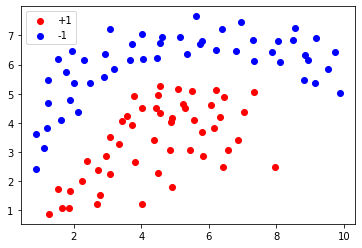

In [ ]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='red', label = '+1')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', label = '-1')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_y = pd.get_dummies(Y, columns = ['Y'])
Y = one_hot_encoded_y.iloc[:,:].values
Y
# for y = +1 it is [0,1]
# for y = -1 it is [1,0]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [ ]:
no_hid_layers = 1
L = []  # no. of neurons in each layer
for i in range(no_hid_layers):
  L.append(3)

# Set parameters
eta = 0.01  # Learning rate
alpha = 0.9  # Momentum factor
epochs = 1000  # No of iterations to run

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

L.insert(0, X.shape[1]) # input layer
L.append(Y_train.shape[1]) # output layer

print('No of nodes in each layer (input, hidden layers, output):' + str(L))

mlp = MLP(L)

mlp.trainMLP(X_train, Y_train, eta, alpha, epochs)

mlp.testMLP(X_test, Y_test)

No of nodes in each layer (input, hidden layers, output):[2, 3, 2]
MLP Initialized
---------------------------------------------------------------------------
[Iter 1]: Loss = 20.12951701306007, Train Accuracy = 45.0 %
[Iter 2]: Loss = 20.078010072501886, Train Accuracy = 42.5 %
[Iter 3]: Loss = 20.05171374238126, Train Accuracy = 52.5 %
[Iter 4]: Loss = 20.013221800370196, Train Accuracy = 52.5 %
[Iter 5]: Loss = 19.959712785496446, Train Accuracy = 52.5 %
[Iter 6]: Loss = 19.886434074571778, Train Accuracy = 52.5 %
[Iter 7]: Loss = 19.780261189438008, Train Accuracy = 52.5 %
[Iter 8]: Loss = 19.624742411383156, Train Accuracy = 52.5 %
[Iter 9]: Loss = 19.410176825654393, Train Accuracy = 52.5 %
[Iter 10]: Loss = 19.13304219398391, Train Accuracy = 52.5 %
[Iter 11]: Loss = 18.78452751007722, Train Accuracy = 53.75 %
[Iter 12]: Loss = 18.3545476608324, Train Accuracy = 55.00000000000001 %
[Iter 13]: Loss = 17.85397988715708, Train Accuracy = 57.49999999999999 %
[Iter 14]: Loss = 17.319

In [ ]:
# Test Point
test_x = np.array([[2.4, 6.3]])

# for y = +1 enter [0,1]
# for y = -1 enter [1,0]
test_y = np.array([[1, 0]])

mlp.testMLP(test_x, test_y)

---------------------------------------------------------------

Correct Predictions = 1/1
Test Accuracy = 100.0 %
